In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df=df.drop(columns='Unnamed: 0')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


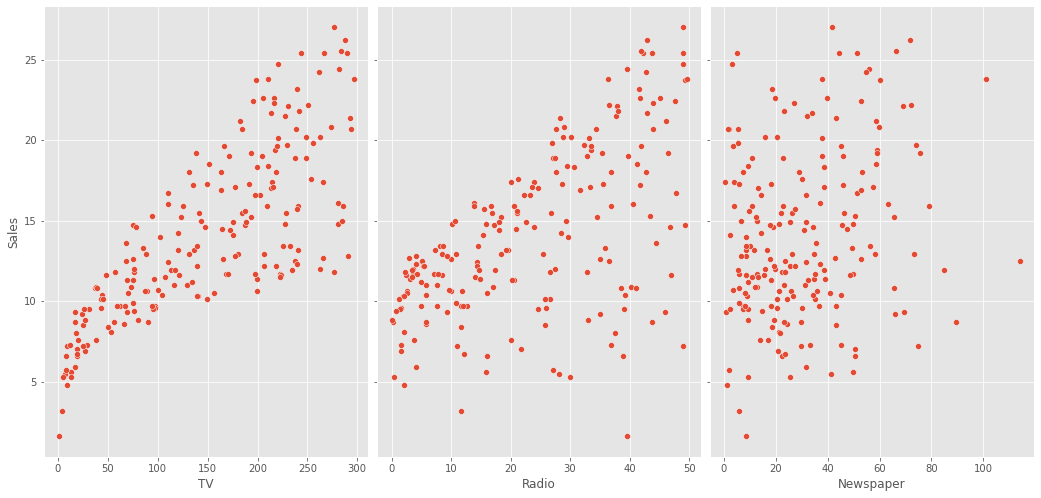

In [8]:
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7);

In [11]:
from sklearn.linear_model import LinearRegression

feature_cols = ['TV', 'Radio', 'Newspaper']
X = df[feature_cols]
y = df.Sales

lm1 = LinearRegression()
lm1.fit(X, y)

print(lm1.intercept_)
print(lm1.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


In [12]:
list(zip(feature_cols, lm1.coef_))

[('TV', 0.045764645455397615),
 ('Radio', 0.18853001691820456),
 ('Newspaper', -0.0010374930424763272)]

<AxesSubplot:>

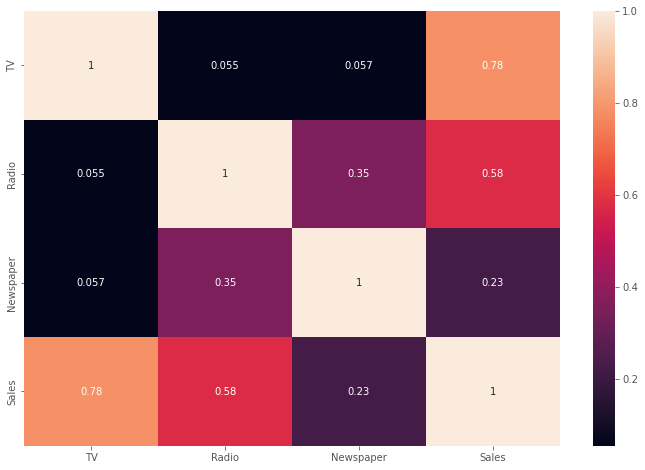

In [13]:
sns.heatmap(df.corr(), annot=True)

In [14]:
from sklearn.metrics import r2_score

lm2 = LinearRegression().fit(X[['TV', 'Radio']], y)
lm2_preds = lm2.predict(X[['TV', 'Radio']])

print("R^2: ", r2_score(y, lm2_preds))

R^2:  0.8971942610828956


In [15]:
lm3 = LinearRegression().fit(X[['TV', 'Radio', 'Newspaper']], y)
lm3_preds = lm3.predict(X[['TV', 'Radio', 'Newspaper']])

print("R^2: ", r2_score(y, lm3_preds))

R^2:  0.8972106381789522


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[['TV', 'Radio', 'Newspaper']]
y = df.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm4 = LinearRegression()
lm4.fit(X_train, y_train)
lm4_preds = lm4.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm4_preds)))
print("R^2: ", r2_score(y_test, lm4_preds))

RMSE : 1.404651423032895
R^2:  0.9156213613792232


In [18]:
X = df[['TV', 'Radio']]
y = df.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm5 = LinearRegression()
lm5.fit(X_train, y_train)
lm5_preds = lm5.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm5_preds)))
print("R^2: ", r2_score(y_test, lm5_preds))

RMSE : 1.3879034699382886
R^2:  0.9176214942248908
